Example notebook for running the scripted ICA.

In [2]:
from astropy.io import fits
import sys
#sys.path.append("/Users/trevormccaffrey/Dropbox/ICA_module/")
sys.path.append("/Users/Trevor1/Dropbox/ICA_module/")
import run_ICA_r20_components
import matplotlib.pyplot as plt
import numpy as np

First test on a $z\sim2$ SDSS quasar.  This is the "base case" that should definitely work!

In [3]:
!ls

__pycache__               icascript_ex.ipynb        spec-6715-56449-0294.fits
components                run_ICA_r20_components.py


In [4]:
spec = fits.open("spec-6715-56449-0294.fits")
spec[1].data

FITS_rec([( 6.075859  , 3.5528, 0.06849907, 0, 0, 1.1762797 ,  6.51885  , 7.608687 ),
          (-0.22572899, 3.5529, 0.07403927, 0, 0, 1.1761874 ,  6.5775423, 7.5596547),
          (11.106407  , 3.553 , 0.06873588, 0, 0, 1.1760949 ,  6.5918446, 7.5279274),
          ...,
          ( 3.855316  , 4.0145, 0.2819265 , 0, 0, 0.92975   ,  8.124724 , 1.9056114),
          ( 4.9396825 , 4.0146, 0.2083139 , 0, 0, 0.93028134, 12.219901 , 1.9242966),
          ( 2.6579323 , 4.0147, 0.15159468, 0, 0, 0.93081576, 19.872316 , 1.9476012)],
         dtype=(numpy.record, [('FLUX', '>f4'), ('LOGLAM', '>f4'), ('IVAR', '>f4'), ('AND_MASK', '>i4'), ('OR_MASK', '>i4'), ('WDISP', '>f4'), ('SKY', '>f4'), ('MODEL', '>f4')]))

<ipython-input-5-cf3f6cd7c7b3>:5: RuntimeWarning: divide by zero encountered in divide
  errsSDSS = 1. / np.sqrt(spec[1].data["IVAR"])


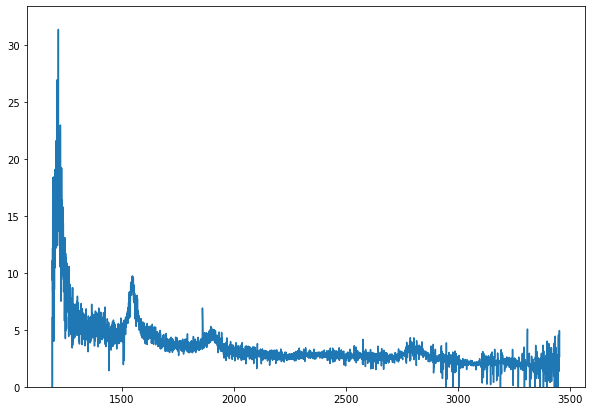

In [5]:
zSDSS = 1.99703

waveSDSS = 10.**spec[1].data["LOGLAM"] / (1+zSDSS)
fluxSDSS = spec[1].data["FLUX"]
errsSDSS = 1. / np.sqrt(spec[1].data["IVAR"])
maskSDSS = spec[1].data["AND_MASK"]

fig = plt.figure(figsize=(10,7))
plt.plot(waveSDSS, fluxSDSS)
plt.ylim(0,None)
plt.show()

In [6]:
wave_ica, flux_ica = run_ICA_r20_components.main_ICA(waveSDSS, fluxSDSS, errsSDSS, maskSDSS, name="", 
                                                     ica_path="/Users/Trevor1/Dropbox/ICA_module/components/",
                                                     plot_spectrum=False, CHISQ=True, comps_use=None)

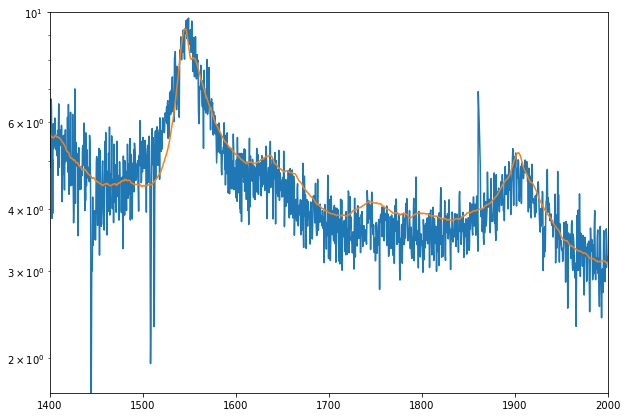

In [7]:
fig = plt.figure(figsize=(10,7))
plt.plot(waveSDSS, fluxSDSS)
plt.plot(wave_ica, flux_ica)
plt.yscale("log")
plt.ylim(1.7,10)
plt.xlim(1400,2000)
plt.show()

---

In [8]:
wave_mod, components_mod, wave_low, components_low, wave_high, components_high = run_ICA_r20_components.load_ICA("/Users/Trevor1/Dropbox/ICA_module/components/")

In [33]:
wave_mod[52:], wave_low

(array([1275.2637, 1275.5574, 1275.8511, ..., 2998.472 , 2999.1625,
        2999.8532]),
 array([3.1056    , 3.10570001, 3.10579999, ..., 3.4769    , 3.477     ,
        3.4771    ]))

In [32]:
for i in range(len(wave_low)-1):
    print(np.log10(wave_low[i+1])-np.log10(wave_low[i]), np.log10(wave_mod[i+1])-np.log10(wave_mod[i]))
    print(np.log10(waveSDSS[i+1]) - np.log10(waveSDSS[i]))

0.00010000880884897256 9.997284207763357e-05
0.0001001358
9.998578424275095e-05 0.00010001873325293786
9.9897385e-05
9.999680199124228e-05 9.999570407748237e-05
0.0001001358
0.00010000780683139254 0.00010000711925428618
9.9897385e-05
0.00010001879877075126 9.998409542699704e-05
9.9897385e-05
9.999576956554179e-05 9.999550009531788e-05
0.0001001358
9.997275096251812e-05 0.0001000068915897323
9.9897385e-05
0.00010001772814849375 0.00010001826991601348
0.0001001358
9.99946994362233e-05 9.99952409541649e-05
9.9897385e-05
0.00010000565827095187 0.00010000660880526979
0.0001001358
9.998263511556971e-05 9.998358521201567e-05
9.9897385e-05
0.00010002754516236223 9.999494259771424e-05
9.9897385e-05
9.997055844879199e-05 0.00010000628684192492
0.0001001358
0.00010001544278370744 9.998326339744068e-05
9.9897385e-05
9.999241512348434e-05 0.00010002894384308902
0.0001001358
0.00010000332810244927 9.997157122976219e-05
9.9897385e-05
0.00010001422824368333 0.00010001722543195868
0.0001001358
9.999120

9.998478017969603e-05 0.00010000147137301241
9.9897385e-05
0.00010002042288936863 0.000100008131540541
0.0001001358
9.999739293586885e-05 9.99851072469582e-05
9.9897385e-05
0.00010000368820906047 9.999176128294707e-05
9.9897385e-05
9.998066596050847e-05 9.99984054264047e-05
0.0001001358
0.00010001625656475 0.00010000503968221608
9.9897385e-05
9.99932285297156e-05 0.00010001166405482209
0.0001001358
9.999949873273906e-05 9.998863813454051e-05
9.9897385e-05
0.00010000575930613209 9.999525640980167e-05
0.0001001358
9.998273610456465e-05 0.00010000186481473605
9.9897385e-05
0.00010001825832617328 0.00010000846335644908
9.9897385e-05
9.999522936965377e-05 0.00010001505203982575
0.0001001358
0.00010000146495237061 9.999202455945877e-05
9.9897385e-05
9.997844372744424e-05 9.999860717702092e-05
0.0001001358
0.00010001391403857696 0.00010000517994912528
9.9658966e-05
9.999088708223525e-05 9.998215701401136e-05
0.00010037422
9.999709773333976e-05 0.00010001830279238177
9.9897385e-05
0.0001000032

9.998899445307075e-05 0.0001000025777164737
9.9897385e-05
0.00010001825641126061 9.997955597995656e-05
0.0001001358
9.999522745518519e-05 0.00010000943980470467
9.9897385e-05
9.999833578788753e-05 0.00010001285630067969
0.0001001358
0.00010000143667454608 9.998982983150384e-05
9.9897385e-05
0.00010000453011915766 9.99932431815509e-05
0.0001001358
0.00010000761612705134 9.999664887638815e-05
9.9897385e-05
9.998459207016808e-05 0.00010000004691956832
9.9897385e-05
0.00010001377186075189 0.00010000343731642047
0.0001001358
9.999074496969129e-05 0.0001000068200713855
9.9897385e-05
9.999381328817947e-05 0.0001000101951889043
0.0001001358
9.999687418993375e-05 9.998716994497059e-05
9.9897385e-05
9.999992767761867e-05 9.999054195519719e-05
0.0001001358
0.0001000029737570074 0.00010002028691769027
9.9897385e-05
0.00010000601243254081 9.999725702680706e-05
9.9897385e-05
0.00010000904370865982 0.00010000060617221251
0.0001001358
9.998601899452453e-05 0.00010000394770459664
9.9897385e-05
0.000100

0.00010000154111144965 0.00010000511141239343
0.0001001358
0.00010000133295307023 9.998208850925394e-05
9.9897385e-05
0.0001000011196379269 0.00010000524136222211
0.0001001358
0.00010000090117001648 0.00010000529566278615
9.9897385e-05
0.00010000067755289166 0.0001000053446253979
9.9897385e-05
0.00010000044878966108 9.998232161434473e-05
0.0001001358
0.00010000021488476563 0.00010000543186006183
9.9897385e-05
9.999997584042575e-05 0.0001000054648283566
0.0001001358
9.999973166197051e-05 0.00010000549247246582
9.9897385e-05
9.999948235162037e-05 9.9982469393467e-05
0.0001001358
9.999922791381621e-05 0.00010000553711053684
9.9897385e-05
9.999896835122257e-05 0.000100005548804738
9.9897385e-05
9.999870366872443e-05 0.00010000555518896448
0.0001001358
9.999843386809815e-05 9.998253208198804e-05
9.9897385e-05
9.999815895511688e-05 0.00010000555734768213
0.0001001358
0.00010002061860925338 0.00010000554782640947
9.9897385e-05
9.999758856649166e-05 0.00010000553301114934
0.0001001358
9.999729

9.999493236323431e-05 0.00010000573855650785
9.9897385e-05
9.999189823384214e-05 0.00010000294016787592
0.0001001358
0.00010000884038641189 0.00010000013841127142
9.9897385e-05
9.998581576597942e-05 9.999733328935889e-05
9.9897385e-05
0.00010000274232213613 9.999452480524695e-05
0.0001001358
9.999968619922583e-05 0.00010001191914454921
9.9897385e-05
0.00010001658797964552 9.998889310702808e-05
0.0001001358
9.999355979228852e-05 0.0001000062714338057
9.9897385e-05
9.99904941099139e-05 0.00010000344022698116
0.0001001358
0.00010000737255477787 0.00010000060567572078
9.9897385e-05
0.00010000429132661637 9.999776778135683e-05
0.0001001358
0.00010000120692588155 9.999492654655384e-05
9.9897385e-05
9.999811935434977e-05 9.999208197442044e-05
9.9897385e-05
9.999502861557374e-05 0.00010000940306609252
0.0001001358
9.999193471132983e-05 0.00010000654254049834
9.9897385e-05
0.00010000875741500437 9.998351897788638e-05
0.0001001358
0.00010000564801648792 0.00010000081615713086
9.9897385e-05
0.000

0.0001001358
9.99889079840166e-05 9.99960710270642e-05
9.9897385e-05
0.00010000017044919929 0.00010000774308593918
0.0001001358
0.00010001141983728701 0.0001000020603778573
9.9897385e-05
9.99883940289159e-05 9.999637629265479e-05
0.0001001358
9.999963306128734e-05 0.00010000802425569333
9.9897385e-05
0.00010001085903166285 0.00010000232944262777
9.9897385e-05
9.998783348219575e-05 9.999663326132335e-05
0.0001001358
9.999904911817126e-05 9.999093571444462e-05
9.9897385e-05
0.00010001025170947031 0.00010000255426723115
0.0001001358
0.00010000433385171092 9.999684601913472e-05
9.9897385e-05
9.999841477936755e-05 0.0001000084459050754
0.0001001358
9.999249449421654e-05 0.00010000272697308077
9.9897385e-05
0.00010000366859808096 9.999700668927858e-05
9.9897385e-05
9.999773802116252e-05 9.999128505633337e-05
0.0001001358
0.0001000088939684396 0.00010000285563194211
9.9897385e-05
9.998586932313813e-05 9.999712334218813e-05
0.0001001358
0.00010001409486015689 0.000100008675305574
9.9897385e-05

0.00010000995255943224 0.00010000896874817755
0.0001001358
9.998692742785309e-05 9.998594406823713e-05
9.9897385e-05
0.0001000080095434619 0.00010000755779993042
0.0001001358
9.999968080398602e-05 9.999940628135917e-05
9.9897385e-05
9.999135251614888e-05 0.00010000612418004096
0.0001001358
0.00010001240214441154 9.999796647397474e-05
9.9658966e-05
9.998937588440171e-05 9.998980910186361e-05
0.00010037422
0.00010001040613438761 0.00010001136970361202
9.9897385e-05
0.0001000020593822093 9.998834391877764e-05
9.9897385e-05
9.999371309366012e-05 0.00010000988467107064
0.0001001358
0.00010000003909960142 0.00010000170812940468
9.9897385e-05
0.00010000635543816472 9.999353193368421e-05
0.0001001358
9.999799703752643e-05 0.00010000019780687097
9.9897385e-05
9.998963910895498e-05 0.00010000685377731244
0.0001001358
0.00010001059830155867 9.999866496146481e-05
9.9897385e-05
9.998757287155158e-05 9.999047649955628e-05
9.9897385e-05
0.0001000085127689232 0.00010001194451270123
0.0001001358
0.0001

In [22]:
waveSDSS[np.argmin(abs(waveSDSS-1260)):np.argmin(abs(waveSDSS-3000))]

array([1260.1115, 1260.4012, 1260.6919, ..., 2997.8435, 2998.533 ,
       2999.2244], dtype=float32)

In [34]:
waveSDSS

array([1191.5406, 1191.8154, 1192.0896, ..., 3449.9202, 3450.7122,
       3451.5078], dtype=float32)

In [42]:
waveleft_rebin = np.flip(10.**np.arange(np.log10(min(wave_mod))-0.0001, np.log10(800), -0.0001))
wavemid_rebin  = wave_mod.copy()
waveright_rebin = 10.**np.arange(np.log10(max(wave_mod))+0.0001, np.log10(10000), 0.0001)

#full grid to use for rebinning
wave_rebin = np.concatenate((waveleft_rebin, wavemid_rebin, waveright_rebin))

np.flip(wave_rebin_arr), np.log10(min(wave_mod))-np.log10(wave_rebin_arr[0])

(array([ 800.01847083,  800.2027031 ,  800.3869778 , ..., 1259.21536434,
        1259.50534278, 1259.79538799]),
 0.00010000000000021103)

In [44]:
wave_rebin

array([ 800.01847083,  800.2027031 ,  800.3869778 , ..., 9993.09469271,
       9995.39595273, 9997.69774269])

In [47]:
loglam_rebin = np.log10(wave_rebin)

In [48]:
edges_rebin = np.nan * np.zeros(len(wave_rebin)+1)

In [52]:
edges_rebin[0] = loglam_rebin[0] - 0.00005
for i in range(len(loglam_rebin)-1):
    edges_rebin[i+1] = loglam_rebin[i] + (loglam_rebin[i+1]-loglam_rebin[i])/2
edges_rebin[-1] = loglam_rebin[-1] + 0.00005

In [53]:
10.**edges_rebin

array([ 799.9263706 ,  800.11058166,  800.29483514, ..., 9994.24525648,
       9996.54678146, 9998.84883644])

In [63]:
np.array(len(loglam_rebin)*[[]], dtype=object)

array([], shape=(10969, 0), dtype=object)

In [57]:
flux_eachbin = len(loglam_rebin)*[[]]

In [79]:
arr = np.array(10*[[np.nan]])
ls = 40*[[np.nan]]

In [80]:
ls[0].append(76)

In [83]:
ls

[[nan, 76],
 [nan, 76],
 [nan, 76],
 [nan, 76],
 [nan, 76],
 [nan, 76],
 [nan, 76],
 [nan, 76],
 [nan, 76],
 [nan, 76],
 [nan, 76],
 [nan, 76],
 [nan, 76],
 [nan, 76],
 [nan, 76],
 [nan, 76],
 [nan, 76],
 [nan, 76],
 [nan, 76],
 [nan, 76],
 [nan, 76],
 [nan, 76],
 [nan, 76],
 [nan, 76],
 [nan, 76],
 [nan, 76],
 [nan, 76],
 [nan, 76],
 [nan, 76],
 [nan, 76],
 [nan, 76],
 [nan, 76],
 [nan, 76],
 [nan, 76],
 [nan, 76],
 [nan, 76],
 [nan, 76],
 [nan, 76],
 [nan, 76],
 [nan, 76]]

In [ ]:
for i in range(len(flux_eachbin)):
    if waveSDSS[i]>edges